## Introduction

For this project, I decided to collect my own dataset using this Raspberry Pi single board computer (cardboard box as part of the Google voice kit) that's been sitting next to my desk since the beginning of the semester. (pictured below) By collecting my own dataset, I wanted to better understand low-level computing metrics as well as gain experience creating my own dataset. I used the python program in the following cell to collect my data.  

I decided to predict program run time using several different metrics such as loop size, average cpu percentage, and average ram percentage. I will be using a multiple linear regression model to predict python loop runtime. Linear regression is a supervised learning algorithm that seeks to fit a plane of best fit through the data. Multiple linear regression differs from univariate linear regression in that the features organized into an $\mathbf{X}$ design matrix with more than one feature column, and so matrix algebra is required to find the line of best fit. We express the linear model with $y = X\beta + \varepsilon$, where y is the vector of observed output values, $\mathbf{X}$ is the input feature matrix, $\beta $ is the vector of parameters, and $\varepsilon$ is the error. To find the error, we use the Least Squares Method, which defines a loss function where error is defined by the error between actual and predicted values, squared and summed.  To solve for $\beta$, we use the closed form solution $\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$. The estimated model can then be used to generate predictions with $\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$.

I initially ran into the problem of my data points being highly clustered together, so I included randomized loop size and artificial overhead into my dataset to make a dataset that more accurately represents the wide variety of different programs that someone could run.

My goal of this project is to answer the question: 

-What kinds of system metrics influence loop program run time?

-How might system runtime impact problem solving on a larger, real-world scale?


<img src="IMG_20251017_201428841_HDR.jpg" width="200">




In [2]:
# # Data collection program 
# import time
# import psutil
# import pandas as pd
# import random

# def loop_with_metrics(n):
#     """
#     Run a simple loop and measure how long it takes.
    
#     Parameters:
#     - n: how many times to loop
    
#     Returns: dictionary with runtime, CPU, and RAM metrics
#     """
#     # Add random background work before the main loop
#     background_work = random.randint(5000, 50000)
#     _ = [i ** 3 for i in range(background_work)]
    
#     # Start the timer
#     start = time.perf_counter()
    
#     # Lists to store measurements
#     cpu_samples = []
#     ram_samples = []
    
    
#     for i in range(n):
#         _ = i ** 2
        
#         # Randomly add small bursts of extra work during the loop
#         if random.random() > 0.95: # 5% chance
#             _ = [j ** 2 for j in range(1000)]
        
#         # Sample CPU and RAM every 10,000 iterations
#         if i % 10_000 == 0:
#             cpu_samples.append(psutil.cpu_percent(interval=None))
#             ram_samples.append(psutil.virtual_memory().percent)
    
#     # Add random background work after the main loop
#     if random.random() > 0.5:
#         background_work = random.randint(1000, 10000)
#         _ = [i ** 2 for i in range(background_work)]
    
#     # Calculate total runtime
#     runtime = time.perf_counter() - start
    
#     # Calculate averages
#     avg_cpu = sum(cpu_samples) / len(cpu_samples) if cpu_samples else 0
#     avg_ram = sum(ram_samples) / len(ram_samples) if ram_samples else 0
    

#     return {
#         "n": n,
#         "runtime_sec": runtime,
#         "avg_cpu_percent": avg_cpu,
#         "avg_ram_percent": avg_ram
#     }


# experiments = []

# num_experiments = 40

# for i in range(num_experiments):
#     # Randomize n (loop count)
#     n = random.randint(100_000, 800_000)
    
#     print(f"  Experiment {i+1}/{num_experiments}: n={n:,}")
    
#     result = loop_with_metrics(n)
    
#     experiments.append({
#         "n": result["n"],
#         "runtime_sec": result["runtime_sec"],
#         "avg_cpu_percent": result["avg_cpu_percent"],
#         "avg_ram_percent": result["avg_ram_percent"]
#     })
    
#     # Variable pause creates more variation
#     time.sleep(random.uniform(0.3, 0.8))

# df = pd.DataFrame(experiments)

# # Save to CSV file
# df.to_csv("experiments.csv", index=False)


# Understanding the data 

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('metrics.csv')
print(df.sort_values(by='n'))

         n  runtime_sec  avg_cpu_percent  avg_ram_percent
37  102891     3.950255        23.245455        16.700000
7   112698     4.396665        23.883333        16.600000
21  138423     5.229148        23.442857        16.600000
14  161388     6.157040        23.800000        16.500000
5   162857     6.192087        23.741176        16.500000
4   190124     7.266170        24.045000        16.500000
19  192524     7.409195        24.155000        16.630000
9   194082     7.452671        24.300000        16.500000
28  224459     8.710700        24.130435        16.700000
8   227327     8.702275        24.291304        16.595652
31  270685    10.328035        24.364286        16.600000
24  277331    10.582325        24.457143        16.700000
38  282264    10.743505        24.337931        16.700000
36  284700    10.907703        24.372414        16.700000
10  287883    10.837346        24.410345        16.500000
6   408625    15.618584        24.504878        16.500000
29  432377    

In [4]:
df.isnull().sum()

n                  0
runtime_sec        0
avg_cpu_percent    0
avg_ram_percent    0
dtype: int64

In [5]:
df.columns

Index(['n', 'runtime_sec', 'avg_cpu_percent', 'avg_ram_percent'], dtype='object')

In [6]:
df.describe()

,n,runtime_sec,avg_cpu_percent,avg_ram_percent
count,40.000000,40.000000,40.000000,40.000000
mean,432326.025000,16.531057,24.457327,16.598215
std,193952.341791,7.406394,0.388203,0.077685
min,102891.000000,3.950255,23.245455,16.500000
25%,259845.500000,9.923701,24.328448,16.500000
50%,503666.000000,19.286196,24.623815,16.600000
75%,567940.500000,21.617526,24.717445,16.669875
max,738389.000000,27.981275,25.048214,16.737097


In [7]:
df.shape

(40, 4)

##### Here we can see that the dataset is made up of 40 observations, with three feaure columns and one target column. Since average RAM percentage remains nearly constant regardless of loop size n, I'll drop that column. This may have been due to the Pi's memory/OS management, the loop program may not have been taxing enough to cause a large change in RAM, or some other reason.

## Pre-processing

In [8]:
df = df.drop(columns=['avg_ram_percent'])

##### Now, I'll visualize the data to see if we can find any trends before modeling. 

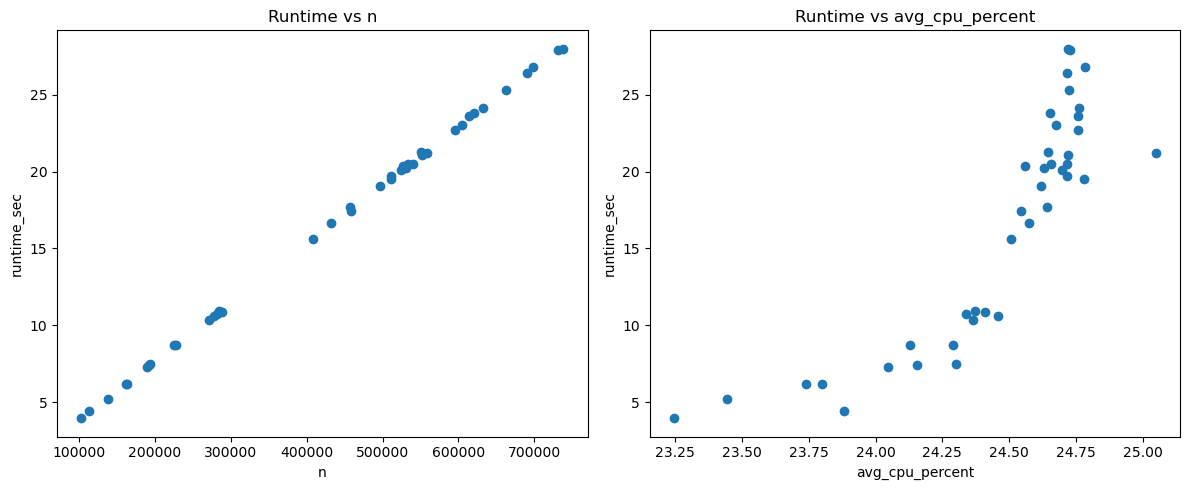

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['n'], df['runtime_sec'])
axes[0].set_xlabel('n')
axes[0].set_ylabel('runtime_sec')
axes[0].set_title('Runtime vs n')

axes[1].scatter(df['avg_cpu_percent'], df['runtime_sec'])
axes[1].set_xlabel('avg_cpu_percent')
axes[1].set_ylabel('runtime_sec')
axes[1].set_title('Runtime vs avg_cpu_percent')

plt.tight_layout()
plt.show()

Interesting! It makes intuitive sense that loop size positively linearly correlates with runtime. However, CPU percentage increases expontentially correlates with runtime. Looking into this a bit further, this could be due to a few things, such as thermal throttling (the Pi was a bit warm while collecting data), higher cpu utilization due to a fuller CPU cache, more background processes with larger n, or some other reason. While interesting, this exponential relationship is problematic for modeling because a linear regression model assumes that a linear relationships exists between features and the target. To address this, I'll apply a non-linear transformation to average CPU percentage to make it more linear. 

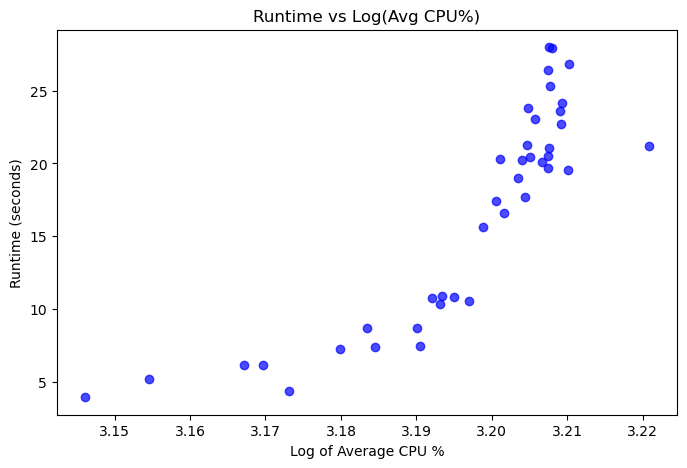

In [10]:
df['log_cpu'] = np.log(df['avg_cpu_percent'])

plt.figure(figsize=(8,5))
plt.scatter(df['log_cpu'], df['runtime_sec'], color='blue', alpha=0.7)
plt.xlabel('Log of Average CPU %')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Log(Avg CPU%)')
plt.show()

This still looks exponential after the log transformation, but this should help the results to be more accurate.

## Modeling

I'll scale the features using standardization, which transforms the data according to this formula: $x' = \dfrac{x - \mu}{\sigma}$

R^2: 0.9999
MAE: 0.0612
RMSE: 0.0843

Coefficients (original scale):
 n          0.000038
log_cpu   -0.032989
dtype: float64
Intercept (original scale): 0.1233501978812761


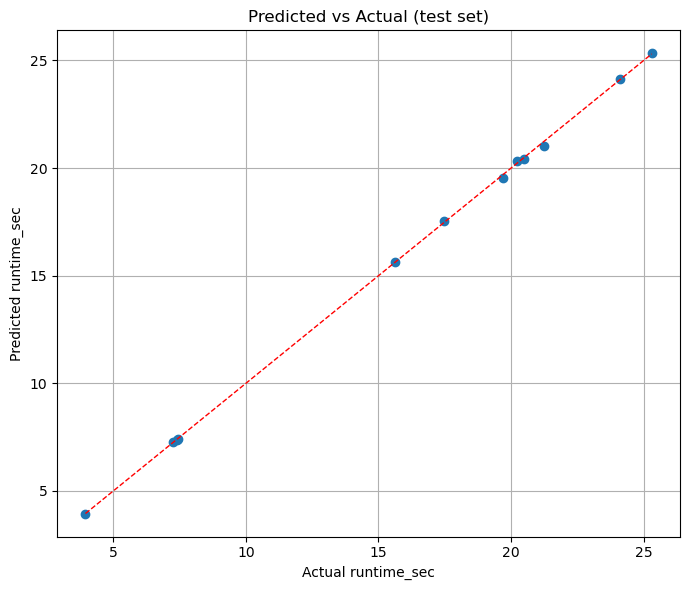

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Choosing feature and target
X = df[["n", "log_cpu"]]
y = df["runtime_sec"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Scaling the features 
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Training the model
reg = linear_model.LinearRegression()
reg.fit(X_train_s, y_train)
y_pred = reg.predict(X_test_s)

# Test metrics
print("R^2:", round(r2_score(y_test, y_pred), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

# Converting back to original feature scale for interpretation
coef_unscaled = reg.coef_ / scaler.scale_
intercept_unscaled = reg.intercept_ - np.sum((scaler.mean_ / scaler.scale_) * reg.coef_)
coef_unscaled = pd.Series(coef_unscaled, index=X.columns)
print("\nCoefficients (original scale):\n", coef_unscaled)
print("Intercept (original scale):", intercept_unscaled)


plt.figure(figsize=(7,6))
sc = plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=1)
plt.xlabel('Actual runtime_sec')
plt.ylabel('Predicted runtime_sec')
plt.title(f'Predicted vs Actual (test set)')
plt.grid(True)
plt.tight_layout()
plt.show()

My R^2 value is nearly 1, so the variation in the data can almost be completely explained by the model. My mean absolute error and my mean squared error are also very low, so my model is performing quite well! However, high accuracy on the training set. 

I can try to use pipeline, or only one featur, k fold, ridge regression

## Evaluation

## Impact

## Conclusion

## References
https://www.geeksforgeeks.org/machine-learning/linear-regression-python-implementation/